## How are in-demand skills trending for Data Engineer?

### Methology

1. Aggregate skill counts monthly
2. Analyze based on percentage of total jobs
3. Plot the monthly skill demand

In [70]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
import seaborn as sns

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

In [85]:
df_de_us = df[(df['job_title_short'] == 'Data Engineer') & (df['job_country']=='United States')].copy()
df_de_us['job_posted_month'] = df_de_us['job_posted_date'].dt.month
df_de_us_exploded = df_de_us.explode('job_skills')

In [ ]:
df_de_us_pivot = df_de_us_exploded.pivot_table(index='job_posted_month', columns='job_skills',aggfunc='size',fill_value=0)

df_de_us_pivot.loc['Total'] = df_de_us_pivot.sum()
df_de_us_pivot = df_de_us_pivot[df_de_us_pivot.loc['Total'].sort_values(ascending=False).index]
df_de_us_pivot = df_de_us_pivot.drop('Total')
de_total = df_de_us.groupby('job_posted_month').size()
df_de_us_percent = df_de_us_pivot.div(de_total/100,axis=0)
df_de_us_percent = df_de_us_percent.reset_index()
df_de_us_percent['job_posted_month'] = df_de_us_percent['job_posted_month'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_de_us_percent = df_de_us_percent.set_index('job_posted_month')
df_de_us_percent = df_de_us_percent.iloc[:,:5]

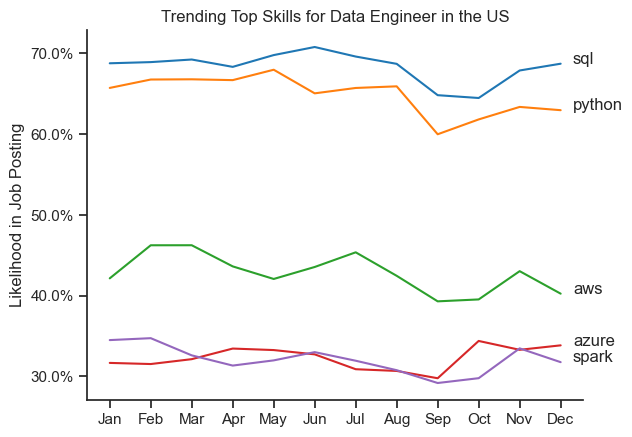

In [ ]:
sns.set_theme(style='ticks')
sns.lineplot(data=df_de_us_percent, dashes=False, palette='tab10')
sns.despine()
plt.title('Trending Top Skills for Data Engineer in the US')
plt.xlabel('')
plt.ylabel('Likelihood in Job Posting')
plt.legend().set_visible(False)

ax = plt.gca()
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter())
for i in range(5):
    plt.text(11.3, df_de_us_percent.iloc[-1, i], df_de_us_percent.columns[i])
plt.show()

'sas'